<a href="https://colab.research.google.com/github/tomeliud/Machine-Learning-Model-to-predict-House-Prices/blob/master/House_Prices_Prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hass Consulting Company House Sales Prediction

Hass Consulting Company is a Real Estate Company that wants to find what Factors affect the Housing Prices and Predict the for future House Sales

## 1. Defining the Question

### a) Specifying the Question



1. Study the Factors that affect housing prices for  Hass Consulting Company

2. Create a Model that Predicts the House Sales Prices





### b) Defining the Metric for Success

> The Metric of Success is by Identifying the appropriate Predictors in order to answer our Research Questions


### c) Understanding the context


> The Research is based on Real Estate, specifically for Hass Consulting Company 

### d) Recording the Experimental Design


> The EDA method shall be used to Understand Data, Prepare and Model

## 2. Reading the Data

In [ ]:
# Loading the Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
housing = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')
housing.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 3. Checking the Data

In [ ]:
housing.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
housing.shape

(21613, 20)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

## 5. Tidying the Dataset

In [ ]:
# Identifying the Missing Data
#
housing.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
#Fill the Null values with median
for col in housing.columns[pd.isnull(housing).any()]:
  housinf[col] = housing[col].fillna(housing[col].median())

In [ ]:
# Check for null
housing.isnull().any()

id               False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [ ]:
# Drop Duplicates
housing.duplicated().any()

True

In [ ]:
housing.drop_duplicates(inplace=True)

housing.shape

(21610, 20)

In [ ]:
# Checking for Anomalies

#Drop columns with only a single value

for col in housing.columns:
    if housing[col].nunique() == 1:
        housing = housing.drop(col, axis=1)
housing.shape

(21610, 20)

In [ ]:
# Check number of zeros in each column
(housing == 0).sum()

id                   0
price                0
bedrooms            13
bathrooms           10
sqft_living          0
sqft_lot             0
floors               0
waterfront       21447
view             19487
condition            0
grade                0
sqft_above           0
sqft_basement    13124
yr_built             0
yr_renovated     20697
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
dtype: int64

In [ ]:
# Drop columns with more than 10000 zeros as values
for col in housing.columns:
  if (housing[col] == 0).sum() > 10000:
    housing.drop([col], 1, inplace=True) 
    
housing.shape

(21610, 16)

**Conclusion** : The Original Data had **21613 records** and         **20 columns** but after removing duplicates and columns whose majority of its values are zeros were Dropped the we were left with    **21610 records** and **16 columns**

In [ ]:
# Import the clean Dataset
housing.to_csv("housing_new.csv")

## 6. Exploratory Analysis

In [ ]:
# Load clean Dataset
data = pd.read_csv('housing_new.csv')

data.drop(['id','Unnamed: 0'], 1, inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503


### **Univarite Analysis**

**Description**

No Categorical Variables In Our Data

In [ ]:
#Description of the numeric data

des = data.describe()
des.loc['Range'] = des.loc['max'] - des.loc['min']
des.loc['IQR'] = des.loc['75%'] - des.loc['25%'] 
# appending interquartile range instead of recalculating it
des = des.append(data.reindex(des.columns, axis=1).agg(['skew', 'kurt']))
des

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,5.401789e+05,3.370847,2.114739,2079.881212,1.510829e+04,1.494239,3.409440,7.656779,1788.347894,1971.003609,98077.945673,47.560049,-122.213910,1986.518695,12769.031976
std,3.673876e+05,0.930110,0.770204,918.500299,4.142323e+04,0.539994,0.650764,1.175500,828.138723,29.372639,53.505373,0.138572,0.140833,685.425781,27305.972464
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,290.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.216125e+05,3.000000,1.750000,1425.500000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,1951.000000,98033.000000,47.470925,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,4.000000,8.000000,2210.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
Range,7.625000e+06,33.000000,8.000000,13250.000000,1.650839e+06,2.500000,4.000000,12.000000,9120.000000,115.000000,198.000000,0.621700,1.204000,5811.000000,870549.000000
IQR,3.233875e+05,1.000000,0.750000,1124.500000,5.648750e+03,1.000000,1.000000,1.000000,1020.000000,46.000000,85.000000,0.207075,0.203000,870.000000,4983.000000


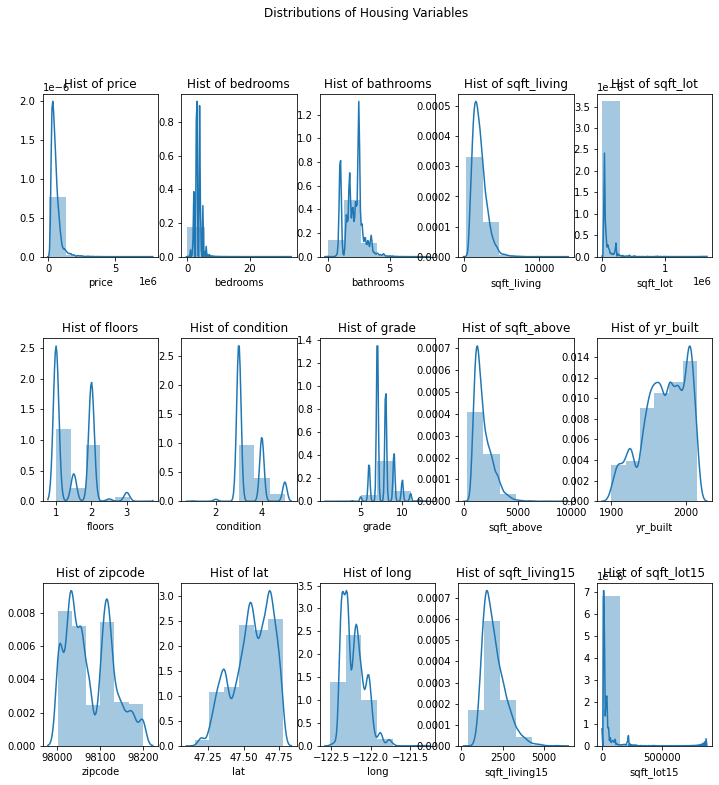

In [ ]:

fig, axes = plt.subplots(nrows=3, ncols=5, figsize = (12,12))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of Housing Variables')

for ax, values, name in zip(axes.flatten(), data.values.T, data.columns):
    sns.distplot(values, ax=ax, bins=len(np.unique(data.values.T[1]))//2)
    ax.set(title="Hist of {}".format(name), xlabel=name)

### **Bivariate Analysis**

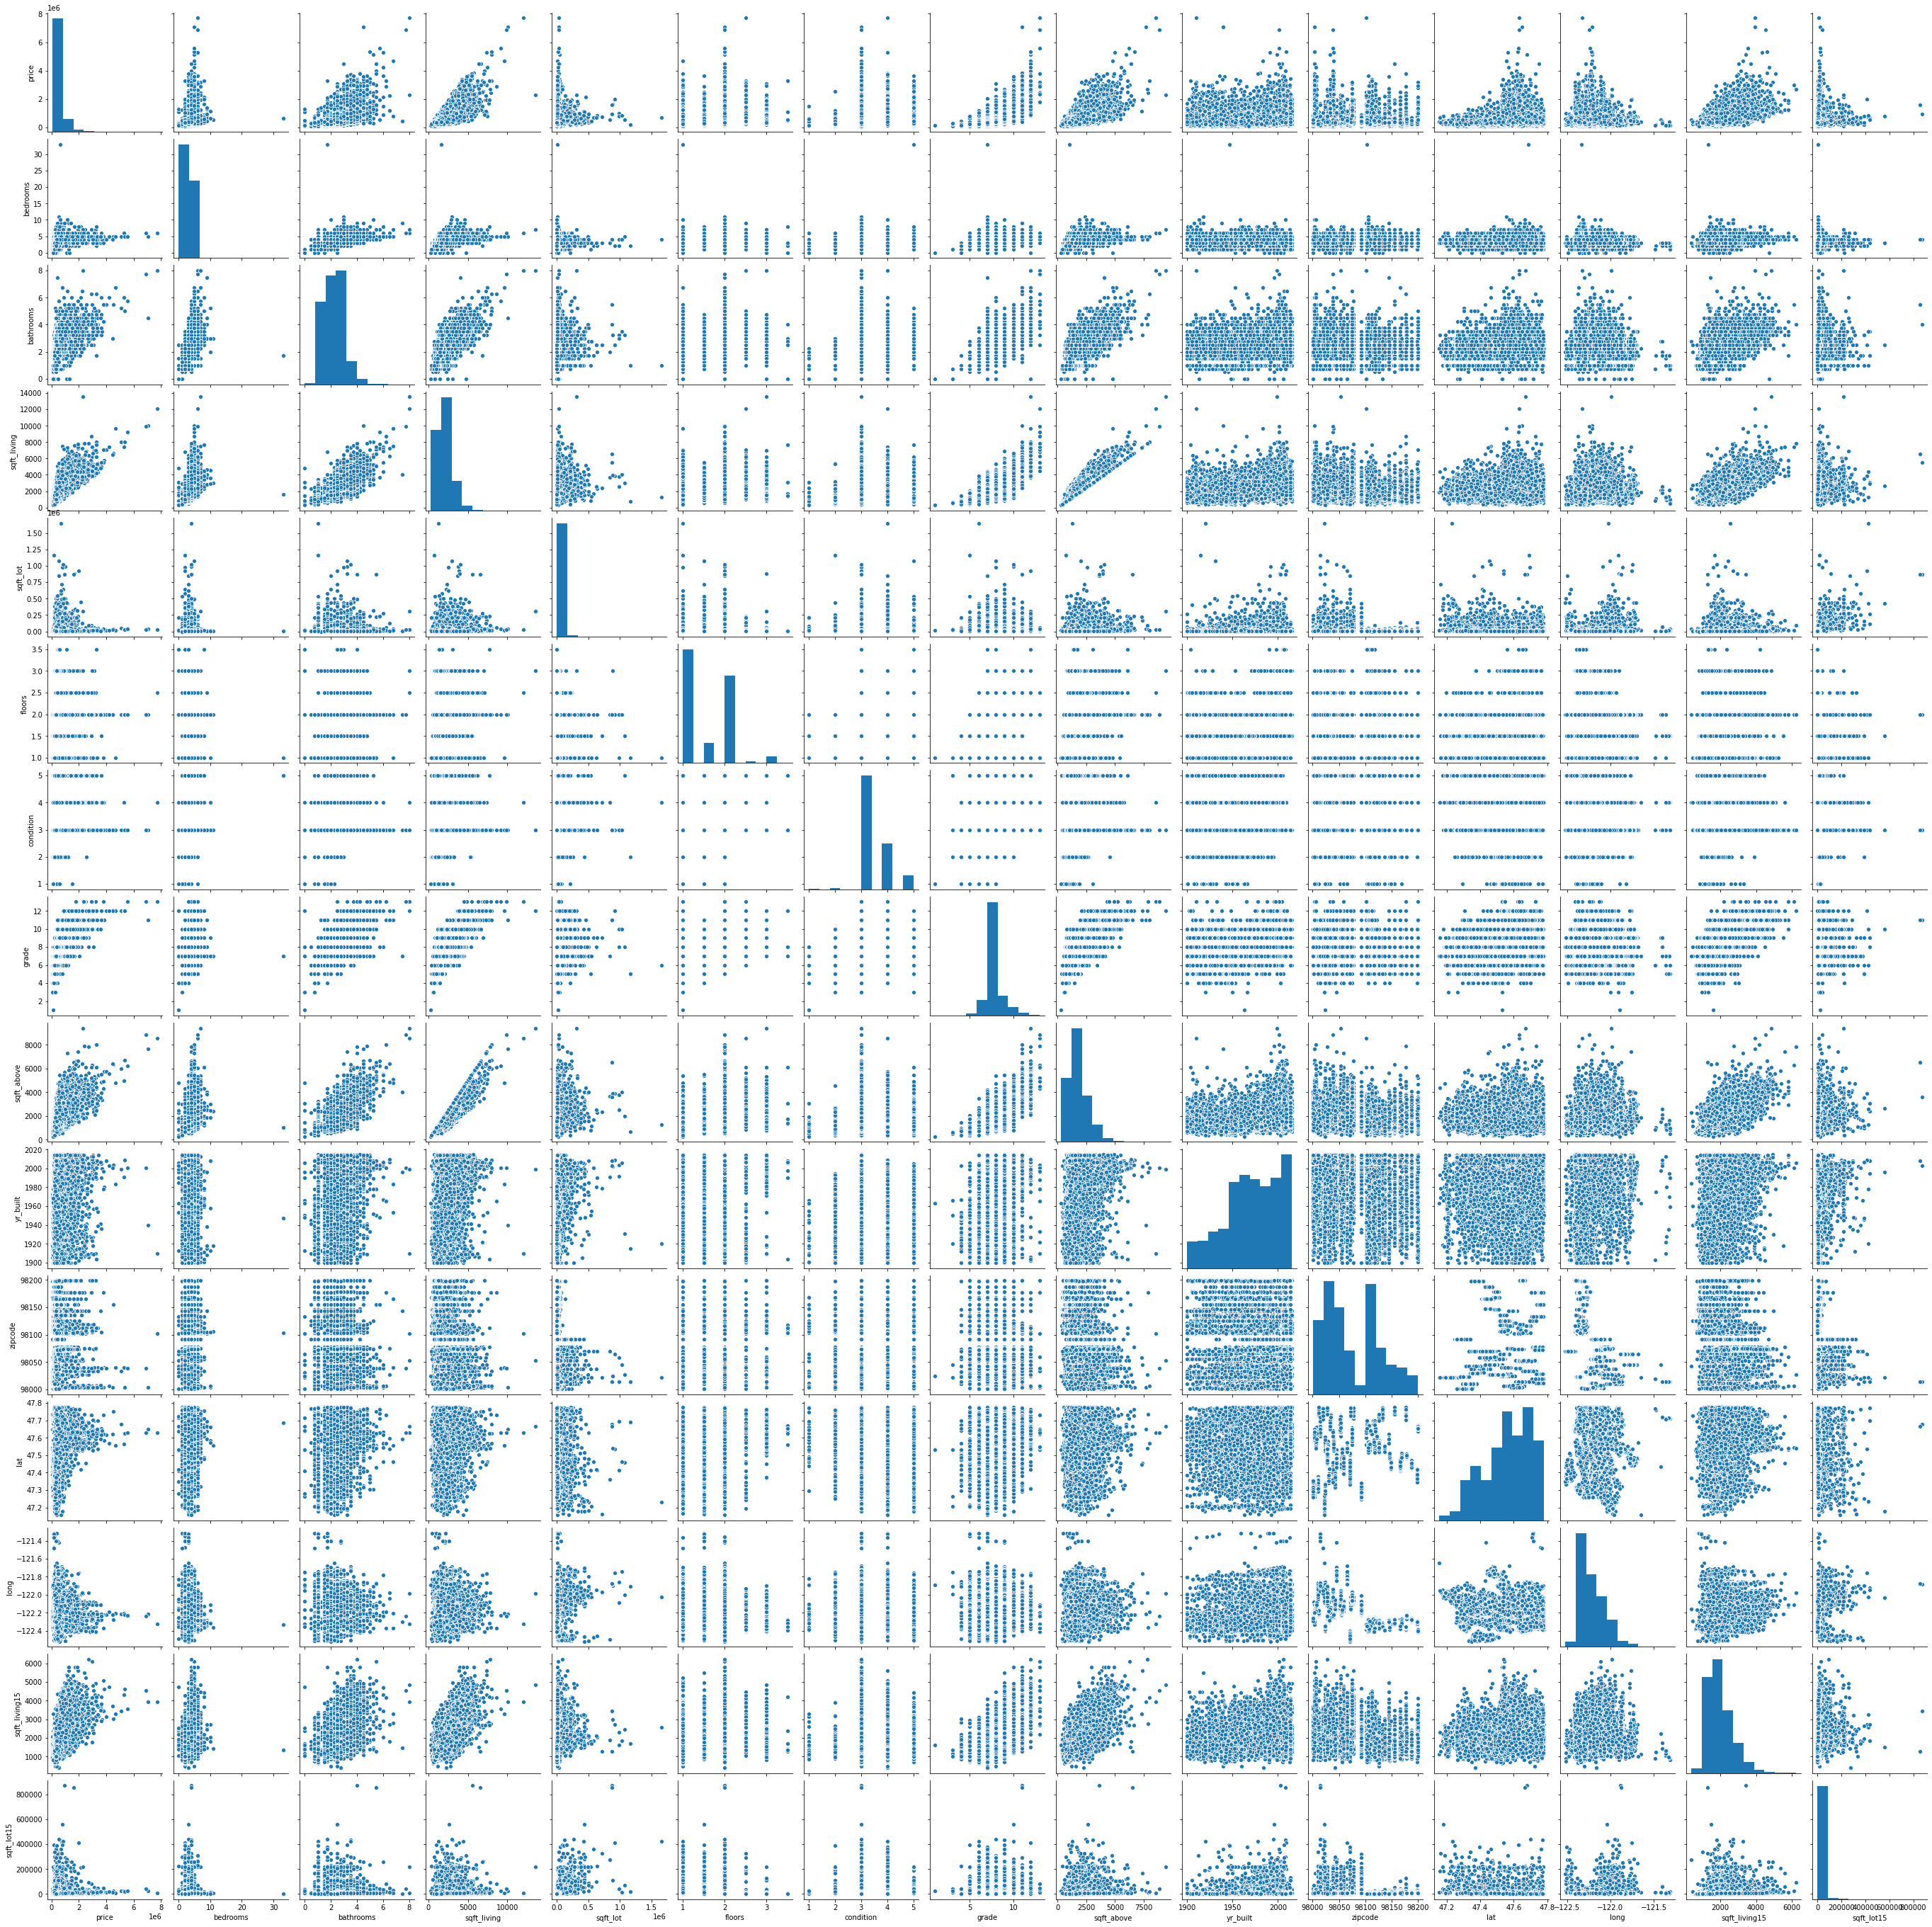

In [ ]:
# Scatter Plot of all the Data Points
sns.pairplot(data)

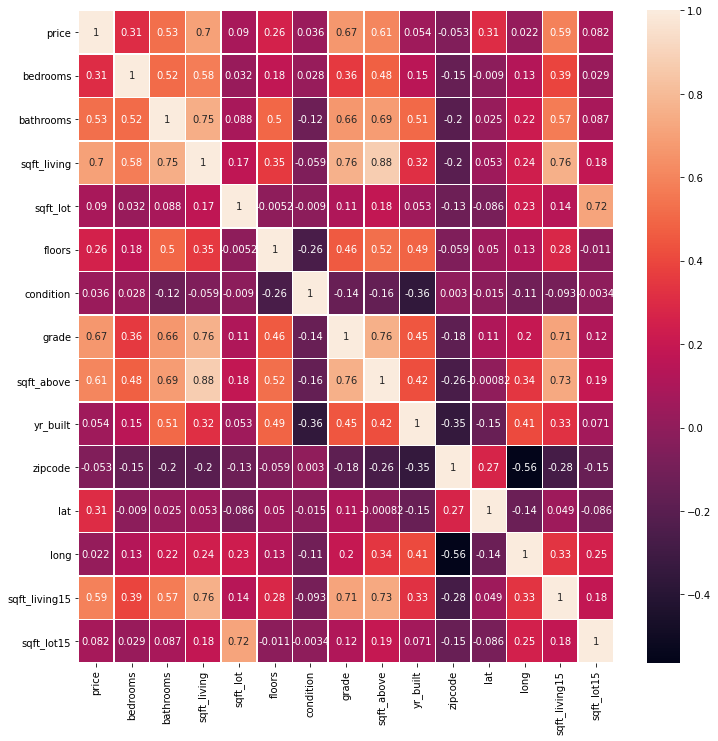

In [ ]:
# A heatmap to show correlation

fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

**Conclusion**

We can see from our Univariate Analysis that our data has skewness in most of its columns.

**Price**, our Target Column has Correlation with the other Variables with 8 out of 15 of the columns
It has Linear Relationship with 13 out of 15 columns


## 7. Implementing the Solution

In [ ]:
# Libraries to Implement the Solution
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error


## Studying the Factors that affect Housing Prices

### Quantile Regression

                                     | bedrooms |

Mean squared error: 349478.25
Variance score: 0.10


~~~~~~~~~~~~~~~~~~~~~~~~~~~| QUANTILE COEFICIENTS |~~~~~~~~~~~~~~~~~~~~~~~~~~~

   quantile      intercept         x_coef          ci_lb          ci_ub
0      0.25  142000.000001   55600.000025   52363.418964   58836.581085
1      0.50  179999.999994   85000.000002   81011.031417   88988.968587
2      0.75  185999.999996  137000.000001  131343.572092  142656.427910 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                               -------------------                             



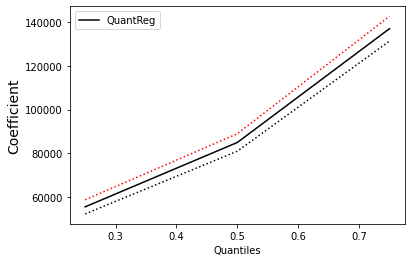

                                     | bathrooms |

Mean squared error: 312645.44
Variance score: 0.28


~~~~~~~~~~~~~~~~~~~~~~~~~~~| QUANTILE COEFICIENTS |~~~~~~~~~~~~~~~~~~~~~~~~~~~

   quantile      intercept         x_coef          ci_lb          ci_ub
0      0.25   98366.666668  116633.333333  113414.622063  119852.044603
1      0.50  114000.000001  173000.000000  168515.289938  177484.710061
2      0.75  146503.000000  237996.000000  231202.326598  244789.673402 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                               -------------------                             



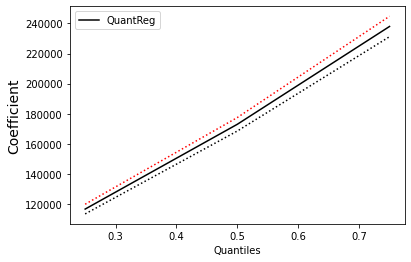

                                     | sqft_living |

Mean squared error: 261622.30
Variance score: 0.49


~~~~~~~~~~~~~~~~~~~~~~~~~~~| QUANTILE COEFICIENTS |~~~~~~~~~~~~~~~~~~~~~~~~~~~

   quantile     intercept      x_coef       ci_lb       ci_ub
0      0.25  30432.624116  165.248227  162.939971  167.556483
1      0.50  52696.035240  216.740088  213.230524  220.249652
2      0.75  87978.720799  265.957447  261.157352  270.757543 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                               -------------------                             



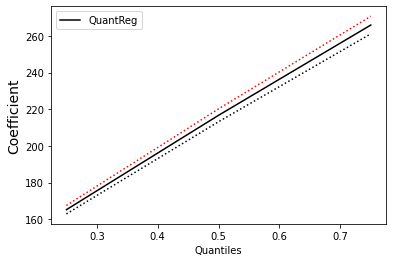

                                     | sqft_lot |

Mean squared error: 365899.52
Variance score: 0.01


~~~~~~~~~~~~~~~~~~~~~~~~~~~| QUANTILE COEFICIENTS |~~~~~~~~~~~~~~~~~~~~~~~~~~~

   quantile      intercept    x_coef     ci_lb     ci_ub
0      0.25  315333.335735  0.532540  0.453061  0.612019
1      0.50  437092.911431  0.723368  0.634108  0.812629
2      0.75  448282.355084  1.532957  1.458666  1.607248 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                               -------------------                             



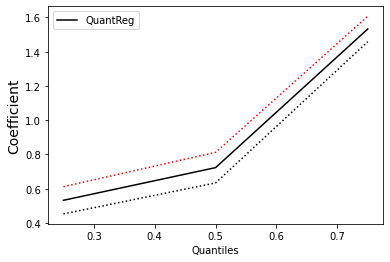

                                     | grade |

Mean squared error: 273561.16
Variance score: 0.45


~~~~~~~~~~~~~~~~~~~~~~~~~~~| QUANTILE COEFICIENTS |~~~~~~~~~~~~~~~~~~~~~~~~~~~

   quantile      intercept         x_coef          ci_lb          ci_ub
0      0.25 -619500.000000  130750.000000  128956.186104  132543.813897
1      0.50 -696000.000000  155166.666667  152769.703823  157563.629510
2      0.75 -825833.333328  190166.666666  185798.566040  194534.767292 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                               -------------------                             



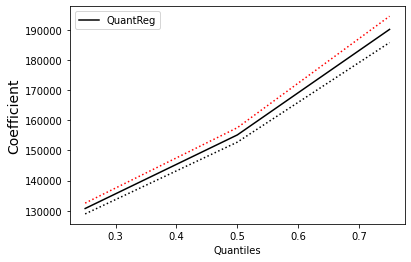

                                     | sqft_above |

Mean squared error: 292357.72
Variance score: 0.37


~~~~~~~~~~~~~~~~~~~~~~~~~~~| QUANTILE COEFICIENTS |~~~~~~~~~~~~~~~~~~~~~~~~~~~

   quantile      intercept      x_coef       ci_lb       ci_ub
0      0.25   82822.580645  153.225806  150.230034  156.221579
1      0.50  133661.354583  199.203187  195.448575  202.957799
2      0.75  194999.999999  250.000000  244.345576  255.654424 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                               -------------------                             



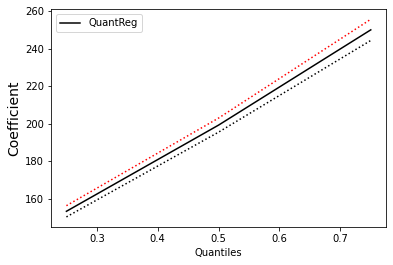

                                     | yr_built |

Mean squared error: 366843.45
Variance score: 0.00


~~~~~~~~~~~~~~~~~~~~~~~~~~~| QUANTILE COEFICIENTS |~~~~~~~~~~~~~~~~~~~~~~~~~~~

   quantile     intercept      x_coef       ci_lb       ci_ub
0      0.25 -1.016675e+06  677.499997  592.232601  762.767392
1      0.50 -8.135135e+04  270.270270  141.028115  399.512425
2      0.75 -2.522727e+05  454.545431  219.511779  689.579084 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                               -------------------                             



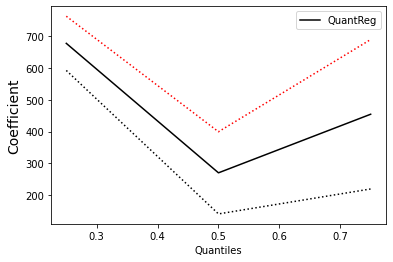

                                     | lat |

Mean squared error: 349647.44
Variance score: 0.09


~~~~~~~~~~~~~~~~~~~~~~~~~~~| QUANTILE COEFICIENTS |~~~~~~~~~~~~~~~~~~~~~~~~~~~

   quantile     intercept        x_coef         ci_lb         ci_ub
0      0.25 -2.248307e+07  4.800420e+05  4.638390e+05  4.962450e+05
1      0.50 -3.277747e+07  6.987847e+05  6.778049e+05  7.197646e+05
2      0.75 -4.931533e+07  1.050039e+06  1.017900e+06  1.082178e+06 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                               -------------------                             



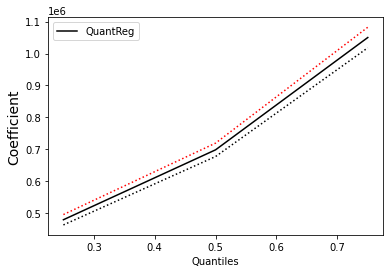

                                     | long |

Mean squared error: 367293.63
Variance score: 0.00


~~~~~~~~~~~~~~~~~~~~~~~~~~~| QUANTILE COEFICIENTS |~~~~~~~~~~~~~~~~~~~~~~~~~~~

   quantile     intercept         x_coef         ci_lb          ci_ub
0      0.25  8.945611e+06   70563.919149  50404.239527   90723.598771
1      0.50  1.378887e+07  109126.986013  82307.302868  135946.669157
2      0.75  1.777567e+07  140187.006035  97576.489714  182797.522356 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                               -------------------                             



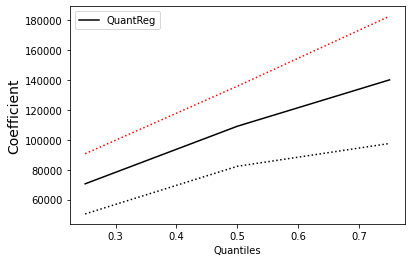

                                     | sqft_living15 |

Mean squared error: 297855.32
Variance score: 0.34


~~~~~~~~~~~~~~~~~~~~~~~~~~~| QUANTILE COEFICIENTS |~~~~~~~~~~~~~~~~~~~~~~~~~~~

   quantile     intercept      x_coef       ci_lb       ci_ub
0      0.25 -19186.893199  193.932039  190.634159  197.229919
1      0.50  10576.923087  240.384615  235.798127  244.971104
2      0.75  43090.909089  295.681818  289.129591  302.234045 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                               -------------------                             



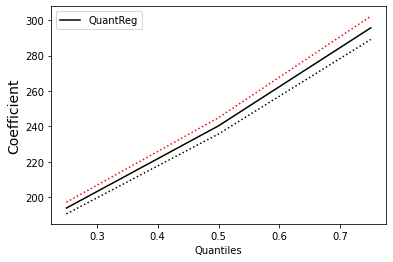

                                     | sqft_lot15 |

Mean squared error: 366128.01
Variance score: 0.01


~~~~~~~~~~~~~~~~~~~~~~~~~~~| QUANTILE COEFICIENTS |~~~~~~~~~~~~~~~~~~~~~~~~~~~

   quantile      intercept    x_coef     ci_lb     ci_ub
0      0.25  317643.839434  0.711449  0.604845  0.818053
1      0.50  440825.602843  0.870936  0.733319  1.008553
2      0.75  626309.195736  1.339110  1.148784  1.529436 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                               -------------------                             



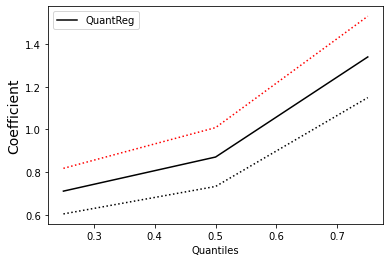

In [ ]:
for i, colval in enumerate(data.drop(['price', 'zipcode','floors','condition'],1)):
  x = np.array(data[colval].values.reshape(-1,1))
  y = np.array(data['price'])

  # mse_calc function performs the quantile regression  
  def mse_calc():

    model1 = LinearRegression(fit_intercept=True, normalize=False)
    model1.fit(x,y)
  
    print(f"                                     | {colval} |\n")
    print("Mean squared error: {0:.2f}".format(np.sqrt(mean_squared_error(y, model1.predict(x)))))
    print('Variance score: {0:.2f}'.format(model1.score(x, y)))
    print("\n")

    # Quantile Regression
    # ----
    #
    mod = smf.quantreg('y ~ x ', data)
    res = mod.fit()

    # Models for other quantiles
    # ----
    #
    quantiles = np.arange(0.25,1,0.25) 
    models = []
    param = []

    for qt in quantiles: 
      res = mod.fit(q = qt )
      models.append(res)
      param.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())

    # Lastly we make a dataframe of the same name, so we we can view our different models.
    # ----
    #
    param = pd.DataFrame(data = param, columns = ['quantile', 'intercept', 'x_coef', 'ci_lb', 'ci_ub'])
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~| QUANTILE COEFICIENTS |~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
    print(param, '\n')  
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
    print("                               -------------------                             \n")
    
    # Linear regression

    # Use OLS to do Linear Regression Prediction
    
    linreg = smf.ols('y ~ x', data).fit()
    ci = linreg.conf_int().loc['x'].tolist()

    lin = dict(intercept = linreg.params['Intercept'],
                  x_coef = linreg.params['x'],
                  ci_lb = ci[0],
                  ci_ub = ci[1])

    #Coefficients vs Quantiles
    n = param.shape[0]
    p1 = plt.plot(param['quantile'], param['x_coef'],color='black' ,label = 'QuantReg')
    p2 = plt.plot(param['quantile'], param['ci_ub'], linestyle = 'dotted', color='red')
    p3 = plt.plot(param['quantile'], param['ci_lb'], linestyle = 'dotted', color='black')
    plt.ylabel('Coefficient', fontsize = 14)
    plt.xlabel('Quantiles')
    plt.legend()
    plt.show()

  mse_calc()



**Conclusion:**

This columns were dropped because they had no linear relationship with our Target Variable


1.   Price
2.   Floors
3.   Condition

Zipcode was dropped because it gave an error that wasn't clear

A linear equation was used for Quantile Regression, from the model we can see that in each column,in the values in the higher Quantiles have larger coefficients meaning that the **higher** the values in this columns **strengthens** the relationship of that **Features** to our **Target Variable**


## Creating a Model that Predicts the House Sales Prices


### Tidy Dataset For Multiple Linear Regression

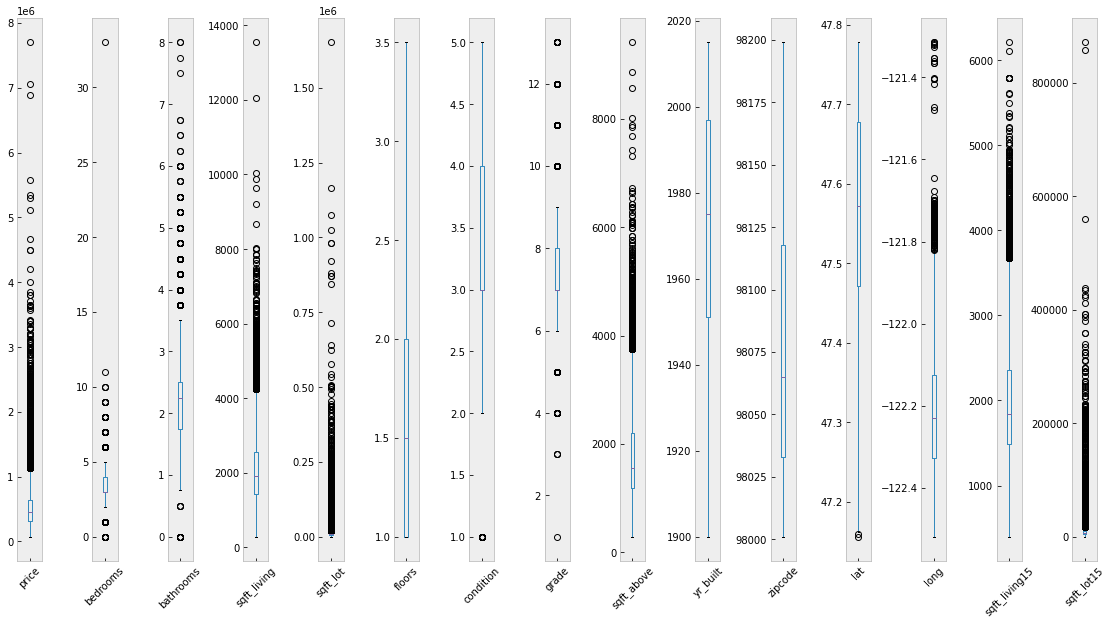

In [ ]:
# Checking for Outliers
#
def outlier_visualiser(dataset_name, numeric_columns_list, width=15, height=10):
    
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = width
    fig_size[1] = height
    plt.rcParams["figure.figsize"] = fig_size
    plt.style.use('bmh')
    
    next_figure = 1
    for col in numeric_columns_list:
        plt.subplot(1, len(numeric_columns_list), next_figure)
        dataset_name.boxplot(col, rot = 45,grid=False)
        next_figure = next_figure + 1

    plt.subplots_adjust(left = 1, right= 2,hspace= 2, wspace=2)
    plt.show()
    
outlier_visualiser(data, data.columns)

In [ ]:
# Dropping Outliers

q3 = data.quantile(0.75)
q1 = data.quantile(0.25)

iqr = q3 -q1

data_o = data[~((data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr))).any(axis=1)]


In [ ]:
print("The number of records before Outliers",data.shape)
print("The number of records after Outliers",data_o.shape)

The number of records before Outliers (21610, 15)
The number of records after Outliers (16606, 15)


In [ ]:
# Drop the columns with no Linear Relation with Our Target
data_new = data_o.drop(['floors','condition'], 1)

### Multiple Linear Regression with PCA

In [ ]:
# Split the data into features and labels
X = data_new.drop(['price','yr_built'],1).values
y = data_new['price'].values.reshape(-1,1)

In [ ]:
#Standardize the Features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
# Split into Training and Test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=50)


In [ ]:
#Apply PCA()
from sklearn.decomposition import PCA

pca = PCA(n_components=11)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
explained_ratio = pca.explained_variance_ratio_
explained_ratio

array([0.39695178, 0.18787537, 0.11575146, 0.08113378, 0.06101047,
       0.0415597 , 0.03625748, 0.02882357, 0.02713376, 0.01275234,
       0.0107503 ])

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Make Predictions
y_pred = linreg.predict(X_test)

# Residuals
residuals = np.subtract(y_pred,y_test)
# Calculate RMSE
from sklearn import metrics
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("The RMSE is:",RMSE)
lin_score = linreg.score(X_test,y_test)
print("The Score for Linear Regression:",)

The RMSE is: 124152.62435498029
The Score for Linear Regression:


In [ ]:
# The coefficients for our Linear Model
coef_dict_baseline = {}
for coef, feat in zip(linreg.coef_.reshape(-1,1),data_new.drop(['price','yr_built'],1).columns):
    coef_dict_baseline[feat] = coef

coef_dict = pd.DataFrame.from_dict(coef_dict_baseline,orient='index' )
coef_dict.reset_index(level=0 ,inplace= True)

coef_dict.columns = ['features','coef']
coef_dict

lin_coef = dict( coef = coef_dict['coef'],
                 features = coef_dict['features'])

df = pd.DataFrame.from_dict(lin_coef)
df

,coef,features
0,39624.851709,bedrooms
1,-53196.007214,bathrooms
2,53863.021179,sqft_living
3,65816.053076,sqft_lot
4,-1901.668791,grade
5,-16278.155606,sqft_above
6,42395.415795,zipcode
7,-7439.821780,lat
8,11919.135945,long
9,69103.417111,sqft_living15


**Residual Plots**

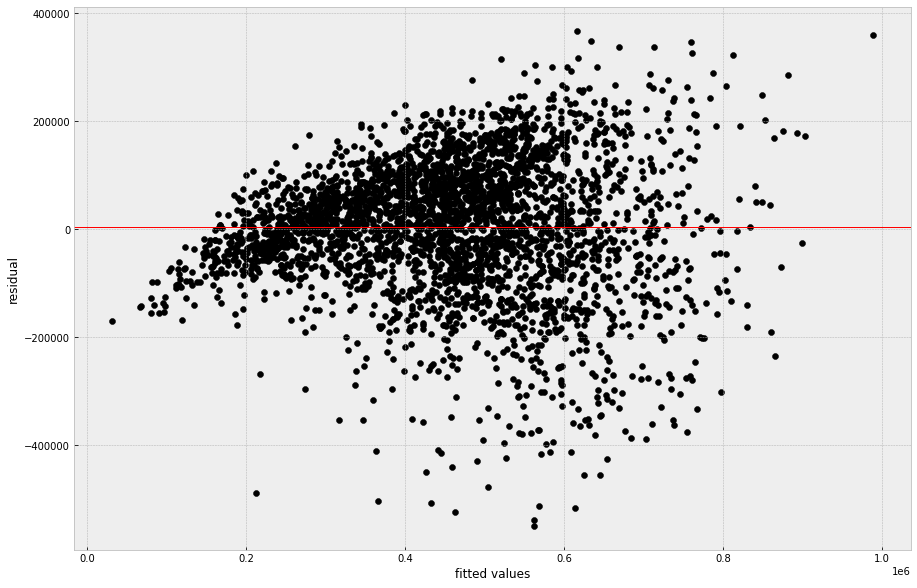

In [ ]:
# Plotting the Residual Plot
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

**Heteroscedasticity**

In [ ]:
# Testing Heteroscedacity using the Bartletts Test

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred.flatten(), residuals.flatten())

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


inf
the variances are homogeneous!


**Conclusion:**

The most residuals are near the mean 0 from residual plots and from the Heteroscedacity using the Bartlett's Test the Variance are Homogeneous

This means the the **difference** between the **predicted values** with the **actual values** is steady throughout our data

### Ridge Regression

We are using the Dataset that has and MutliCollinearity

In [ ]:
# Drop columns with no linear relationship with our Target
data_var = data.drop(['floors','condition'],1)

In [ ]:
#Feautures and Labels

X = data_var.drop('price',1).values
y = data_var['price'].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=50)

In [ ]:
# Use GridSearch to find the best value for alpha 
ridge = Ridge(normalize=True)
clf = GridSearchCV(ridge, param_grid={'alpha':np.logspace(-3,5,10)}, scoring='neg_root_mean_squared_error', n_jobs =1,refit=True, cv = 20)

In [ ]:
#apply it our data
clf.fit(X_train,y_train)
print("The Best Parameter",clf.best_params_)
print("The RMSE",abs(clf.best_score_))

The Best Parameter {'alpha': 0.007742636826811269}
The RMSE 213374.5742721542


In [ ]:
# Fit the Parameter to the Ridge Regression
ridge = Ridge(normalize=True, alpha=0.007742636826811269)
ridge.fit(X_train,y_train)
print("The Ridge score is:", ridge.score(X_test,y_test))
print("The RMSE is:",np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))

The Ridge score is: 0.661355744133354
The RMSE is: 218334.35563931626


In [ ]:
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_.reshape(-1,1),data_var.drop('price',1).columns):
    coef_dict_baseline[feat] = coef

coef_dict = pd.DataFrame.from_dict(coef_dict_baseline,orient='index' )
coef_dict.reset_index(level=0 ,inplace= True)

coef_dict.columns = ['features','ridge_coef']
coef_dict

ridge_coef = dict( ridge_coef = coef_dict['ridge_coef'],
                 features = coef_dict['features'])

df = pd.DataFrame.from_dict(ridge_coef)
df

,ridge_coef,features
0,-41743.463793,bedrooms
1,55716.997548,bathrooms
2,167.975361,sqft_living
3,0.069491,sqft_lot
4,101896.143155,grade
5,17.496091,sqft_above
6,-3218.374630,yr_built
7,-488.248604,zipcode
8,544961.625340,lat
9,-250037.967456,long


### Lasso Regression

In [ ]:
# Use GridSearch to get the best parameter  
lasso = Lasso(normalize=True)

parameters = parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
clf = GridSearchCV(lasso, param_grid=parameters, scoring='neg_root_mean_squared_error', n_jobs =1,refit=True, cv = 20)

In [ ]:
# Check for best parameters
clf.fit(X_train,y_train)
print(clf.best_params_)
print(abs(clf.best_score_))

{'alpha': 1.9000000000000001}
213383.16436000858


In [ ]:
# Apply the Parameters to Lasso
lasso = Lasso(normalize=True, alpha =1.9000000000000001)
lasso.fit(X_train,y_train)
print("The Lasso Score is:",lasso.score(X_test,y_test))
print("The RMSE score is:",np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))


The Lasso Score is: 0.6615803579222852
The RMSE score is: 218261.93592363122


In [ ]:
# The Coefficients
coef_dict_baseline = {}
for coef, feat in zip(lasso.coef_.reshape(-1,1),data_var.drop('price',1).columns):
    coef_dict_baseline[feat] = coef

coef_dict = pd.DataFrame.from_dict(coef_dict_baseline,orient='index' )
coef_dict.reset_index(level=0 ,inplace= True)

coef_dict.columns = ['features','lasso_coef']
coef_dict

ridge_coef = dict(lasso_coef = coef_dict['lasso_coef'],
                 features = coef_dict['features'])

df = pd.DataFrame.from_dict(ridge_coef)
df

,lasso_coef,features
0,-42674.985014,bedrooms
1,54067.062208,bathrooms
2,175.042605,sqft_living
3,0.043890,sqft_lot
4,103342.091351,grade
5,12.197219,sqft_above
6,-3230.037030,yr_built
7,-491.572776,zipcode
8,545093.920634,lat
9,-244542.550717,long


### ElasticNet Regression

In [ ]:
# Get parameters for Elastic Net
elastic = ElasticNet(normalize=True)
clf = GridSearchCV(elastic, param_grid={'alpha':np.logspace(-3,5,10), 'l1_ratio':np.arange(0,1,0.1)}, scoring='neg_root_mean_squared_error',cv=20, refit=True)

In [ ]:
# The best parameter and score
clf.fit(X_train,y_train)
print("The Best Parameters are:",clf.best_params_)
print("The RMSE is:",abs(clf.best_score_))

The Best Parameters are: {'alpha': 0.001, 'l1_ratio': 0.9}
The RMSE is: 249758.26399400458


In [ ]:
#Apply the parameters to Elastic 
elastic = ElasticNet(normalize=True, alpha=0.001, l1_ratio=0.9)
elastic.fit(X_train,y_train)
print("The Elastic Score:", elastic.score(X_test,y_test))
print("The RMSE is:", np.sqrt(mean_squared_error(y_test, elastic.predict(X_test))))

The Elastic Score: 0.5172073651034879
The RMSE is: 260693.7024945741


In [ ]:
# The Coefficients
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_.reshape(-1,1),data_var.drop('price',1).columns):
    coef_dict_baseline[feat] = coef

coef_dict = pd.DataFrame.from_dict(coef_dict_baseline,orient='index' )
coef_dict.reset_index(level=0 ,inplace= True)

coef_dict.columns = ['features','elastic_coef']
coef_dict

elastic_coef = dict(elastic_coef = coef_dict['elastic_coef'],
                 features = coef_dict['features'])

df = pd.DataFrame.from_dict(elastic_coef)
df

,elastic_coef,features
0,9673.857761,bedrooms
1,39616.314866,bathrooms
2,55.231786,sqft_living
3,0.082664,sqft_lot
4,42210.096810,grade
5,44.329003,sqft_above
6,-646.524308,yr_built
7,37.416920,zipcode
8,255216.264744,lat
9,-91201.513064,long


### Scores

In [ ]:
models_score = dict(Linear_Score_PCA = lin_score,
                    Ridge_Score = ridge.score(X_test,y_test),
                    Lasso_Score = lasso.score(X_test,y_test),
                    ElasticNet_Score = elastic.score(X_test,y_test))
scores = pd.DataFrame.from_dict(models_score,orient='index')
scores.reset_index(level=0 ,inplace= True)

scores.columns = ['Models','Model_score']
scores

,Models,Model_score
0,Linear_Score_PCA,0.575909
1,Ridge_Score,0.661356
2,Lasso_Score,0.661580
3,ElasticNet_Score,0.517207


######  Conclusion


From the 4 Models we can see from the scoring table above that when we use PCA with Multiple Linear Regression the Accuracy it achieves **57.59% Accuracy**.
As PCA reduces Features it removes MultiCollinearity as well

The best scoring model is Ridge Model, it Improved slightly from the Multiple Linear Regression which is **66.15% Accuracy**

Elastic had the poorest score, **51.7% Accuracy**  this is might have caused by having few records, Elastic works best with large datasets

## 8. Challenging the solution

The Accuracy for the Linear Model can be Improved by not using PCA to remove Multicollinearity, look into other methods of removing MultiCollinearity

For the other 3 Models we can look for Data that has Strong MultiCollinearity.
**ElasticNet Regression** works better with large dataset thus we can exclude it from a small dataset

Improving the Accuracy of the models can be done by looking for Features with Strong Correlation with our **Target Variable** (Price)

